# Real Estate Price Prediction Project
#### In this project, We will visualize and make calculations from Real Estate Price data using numpy, matplotlib, and pandas. The dataset is taken from Kaggle.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [4]:
df1 = pd.read_csv("C:\\Users\\mclar\\Downloads\\Bengaluru_House_Data.kaggle\\Bengaluru_House_Data.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df1.shape

(13320, 9)

### Examining the column area data type.

In [6]:
df1.groupby('area_type')['area_type'].agg('count') #  alternativo df1["area_type"].value_counts()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

### Dropping columns that would not be necessary for our analysis.

In [8]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis = 'columns')
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


### Starting the data cleaning.

In [9]:
df2.isna().head()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [10]:
df2.isnull().sum()  #'isnull' ou 'isna' é o mesmo

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### as we have some null values we can drop or fill with the average.
as null values are very few we can safely drop.

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape # Ja temos menos colunas

(13246, 5)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Let's adjust these variations in order to be more explicit.

we are going to use lambda and the split function to separate and remove from a row of a column (in this case size) the element we want.

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) 
df3.head()

C:\Users\mclar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3['bhk'].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### As it can be seen, there is irregularity in our data such as nmr of rooms that do not match.
### with the total size of the apartment, needing to correct or eliminate these irregularities.

In [18]:
 df3.total_sqft.unique() ###  outra forma : df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### As you can see we have 'weird' values, so check if we have values that are not 'float'.

In [19]:
# Criamos então uma função que verifica se um numero é float ou não
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [20]:
# '~' representa not ou seja retorna o contrario do q tamos a pedir ou seja, retorna valores não float para a coluna em questão 
df3[~df3.total_sqft.apply(is_float)].head(10) # temos a nossa coluna com valores não 'float' da coluna 'total_sqft' 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


### We will create a function to average the values separated by the dash '-', for the others we could create a function to convert to another unit (in case the q need it), but in this case we will simply ignore.

In [21]:
def convert_sqft_to_mediunvalue(x):
    value = x.split('-')            #separa o valor pelo traço '-'
    if len(value) == 2:              # se os elementos separados forem igual a 2 aplica o codigo abaixo
        return (float(value[0]) + float(value[1]))/2  # o valor separado da posição 1 + o valor separado da posição 2
    try:                             # se for um nmr normal convert para float
        return float(x)
    except:
        return None                  #Se houver alguma excepcao ao que definimos em cima retorna nada

In [22]:
convert_sqft_to_mediunvalue('500') #é um nmr então converte para float


500.0

In [23]:
convert_sqft_to_mediunvalue('ghsagh')  # n faz nada

In [24]:
convert_sqft_to_mediunvalue('3090 - 5002') #aplica o primeiro if

4046.0

In [25]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_mediunvalue)
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [26]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

### So far we've cleaned up our column (total_sqft), we've removed unnecessary features.

# 3 : Feature Engineering


In [27]:
df5 = df4.copy()


### Moving forward we will create a new column of the price per land / and make some outlier featuring.

In [28]:
df5['price_per_sqft'] = df5.price*100000/df5.total_sqft
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Let's handle the localization now.

In [29]:
df5.location.describe() 

count          13246
unique          1304
top       Whitefield
freq             534
Name: location, dtype: object

In [30]:
len(df5.location.unique())

1304

### !!! We have many repeated columns in location (13246total for 1304 types).

In [31]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.location.value_counts()
location_stats.head(20)

Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
Hoodi                        88
KR Puram                     88
Name: location, dtype: int64

In [32]:
df5.location = df5.location.apply(lambda x: x.strip()) # função strip remove os espaços vazios que se encontram na esquerda ou direita
location_stats = df5.groupby('location')['location'].agg('count') # se adicionarmos  '.sort_values(ascending=False)' fica igual a de cima
location_stats.head(20)

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Jayanagar                                14
1st Block Koramangala                              10
1st Phase JP Nagar                                 25
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Kri

In [33]:
len(df5.location.unique())

1293

### In the two lines above the same thing , but the count is different.
### What we see above is that some locations have only 1 data and others have more than 100 data.

In [34]:
len(location_stats[location_stats <= 10]) #podemos ver que localizações com menos de 1 dado ainda são muitas

1052

In [35]:
location_less_than_ten = location_stats[location_stats <= 10]
location_less_than_ten.head(20)

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Koramangala                              10
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Krishna Layout                      1
2 Bedroom Furnished Farm House in Kolar Road        1
2Electronic City Ph

In [36]:
len(df5.location.unique()) # podemos ver a quantidade de localização que tinhamos

1293

In [37]:
df5.location = df5.location.apply(lambda x: 'other'if x in location_less_than_ten else x)
len(df5.location.unique())

242



### Basically we transform all locations with less than 1 data into 'other', that means everything that had a data in the location is turned into other.

In [38]:
df5.tail(100)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13219,Laggere,7 Bedroom,1590.0,9.0,132.00,7,8301.886792
13220,Attibele,1 BHK,520.0,1.0,15.00,1,2884.615385
13221,other,9 Bedroom,1178.0,9.0,75.00,9,6366.723260
13222,Electronic City,3 BHK,1360.0,2.0,64.99,3,4778.676471
13223,other,2 BHK,1155.0,2.0,64.00,2,5541.125541
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


# 4 : Outlier Removal
Removing Data errors or data that represents a large variation in our data can cause problems
For this we can use some techniques such as e.g. standard deviation, or domains.
A common problem in this dataset is the disparity in the number of rooms depending on the size of the apartment, and let's try to correct this, on average a room is 300sqft in size, much more than this can be an outlier.

In [134]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [39]:
df5[df5.total_sqft/df5.bhk <300 ].head() #todos os quartos que possuem menos de 300sqft

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


### As you can see, for 6 bedroom or 8 bedroom apartments totaling +- 1000 sqft, which is clearly abnormal, we need to remove this data.

In [40]:
df5.shape

(13246, 7)

In [41]:
df6 = df5[~(df5.total_sqft/df5.bhk <300 )] #df6 vai receber valores sem os que se encontram presente na condição atual
                                           # devido a negação ~
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


## We use one of the ways to remove outliers, but we can have other outliers,
## for example we can check the price of houses if they are too high or low depending on the ## of the apartment (zone, room nmr and total sqft).

In [42]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### We can see that we have prices per meter as the very low minimum for an apartment (unlikely), as well as an extremely high max price that may even be possible, but in order not to cause too much disparity in our model, it is best to remove them.

To do this, let's create a function that removes these extremes based on the standard deviation, assuming that our dataset has a normal distribution in which the 70% turn of the data is close to the mean and standard deviation, any q is too far removed.

In [43]:
def remove_outliers(df):  #input um dataframe
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #agrupamos incialmente por localização
        m = np.mean(subdf.price_per_sqft) #calculamos a media do preço total para essa localização
        st = np.std(subdf.price_per_sqft) #calculamos od.padrão do preço total para essa localização
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] #Aqui filtramos: mantemos todos os pontos que teem o valor mais alto dq (m-st) e menos dq (m+st) 
        df_out = pd.concat([df_out,reduced_df], ignore_index=True) # 
    return df_out
                            

In [44]:
df7 = remove_outliers(df6)
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


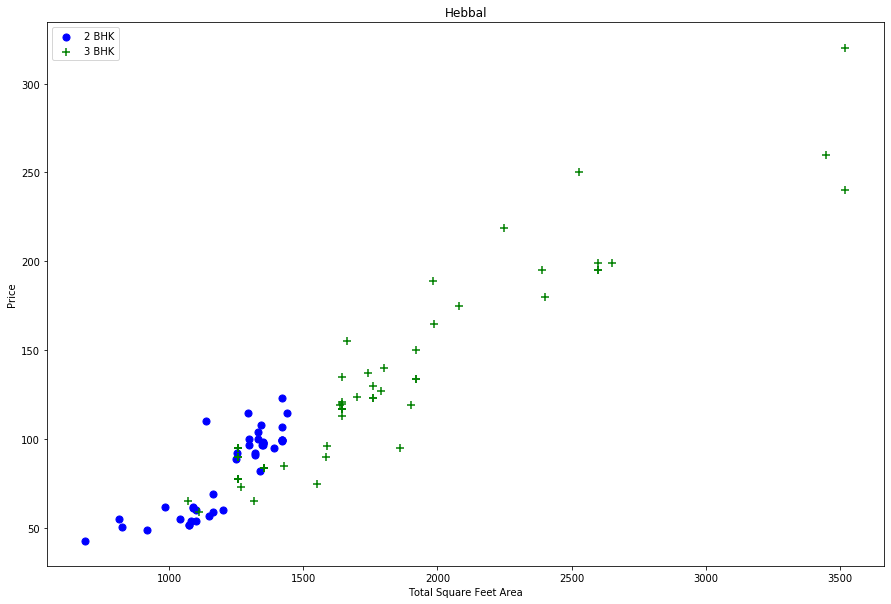

In [45]:
def plot_scatter_chart(df,location):
    bhk2 =df[(df.location==location) & (df.bhk==2)]
    bhk3 =df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title (location)
    plt.legend()
plot_scatter_chart(df7,'Hebbal') # a localização pode ser alterada

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {'mean': np.mean(bhk_df.price_per_sqft),
                            'std': np.std(bhk_df.price_per_sqft),
                            'count': bhk_df.shape[0]
                             }
            for bhk, bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

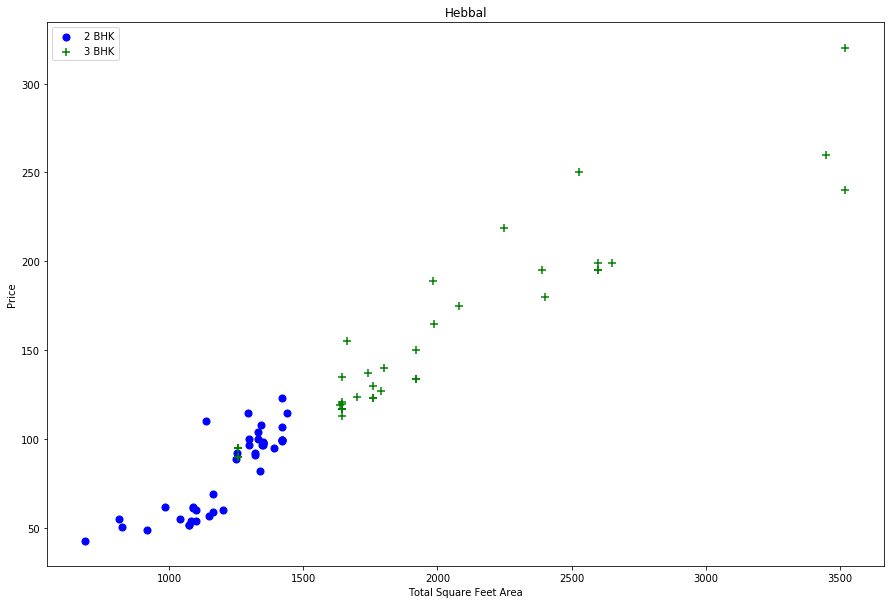

In [47]:
plot_scatter_chart(df8,'Hebbal') # a localização pode ser alterada

Text(0, 0.5, 'Count')

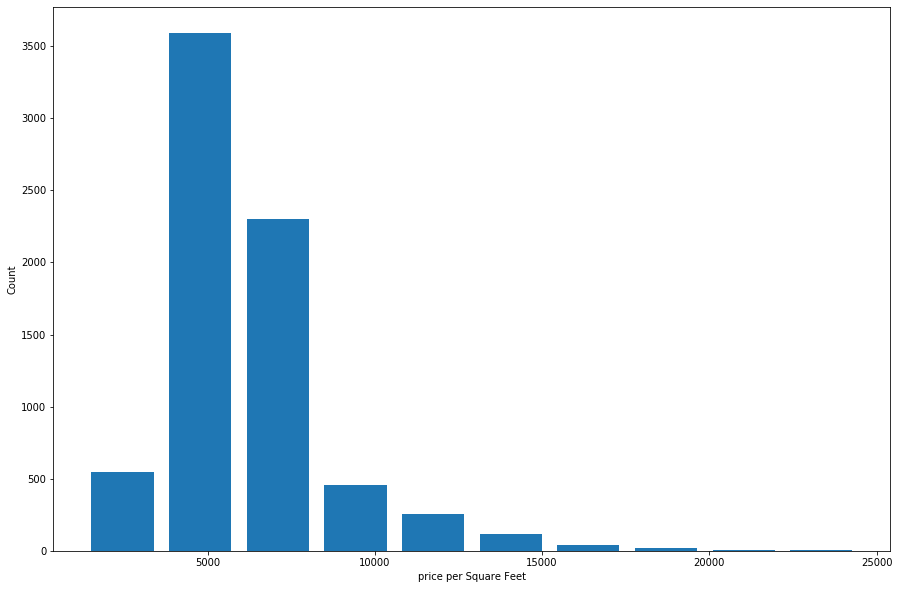

In [48]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('price per Square Feet')
plt.ylabel('Count')

In [49]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

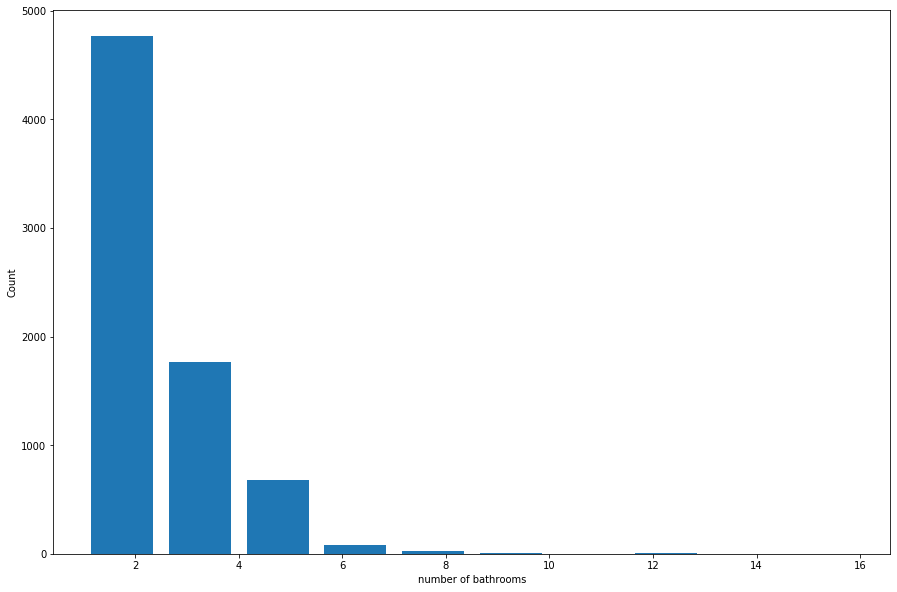

In [51]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('Count')

In [52]:
df8[df8.bath > df8.bhk+2] #removendo todos os apartamentos que tem dois quartos a mais do q o nmr de quartos

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [164]:
df9 = df8[~(df8.bath > df8.bhk+2)] # removendo os dados da situação acima..tb podia ser desta forma df9 = df8[(df8.bath < df8.bhk+2)] ...
df9.shape 

(7325, 7)